# Infering the phylogenetic relationship between archaic and AMH Y

In [1]:
library(tidyverse)
library(here)
library(phangorn)
library(cowplot)
library(lemon)

suppressPackageStartupMessages({
    library(ggtree)
    library(treeio)
})

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

here() starts at /mnt/expressions/mp/archaic-ychr

Loading required package: ape


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘lemon’


The following object is masked from ‘package:purrr’:

    %||%


The following objects are masked from ‘package:ggplot2’:

    CoordCartesian, element_render


Loading ychr



Bootstrapping info for ape/phangorn: http://ape-package.ird.fr/ape_faq.html#bootphylo

Locations of missing genotypes:

In [2]:
aln_full <- read.dna("../data/fasta/full_merged_nodmg.fa", format = "fasta")

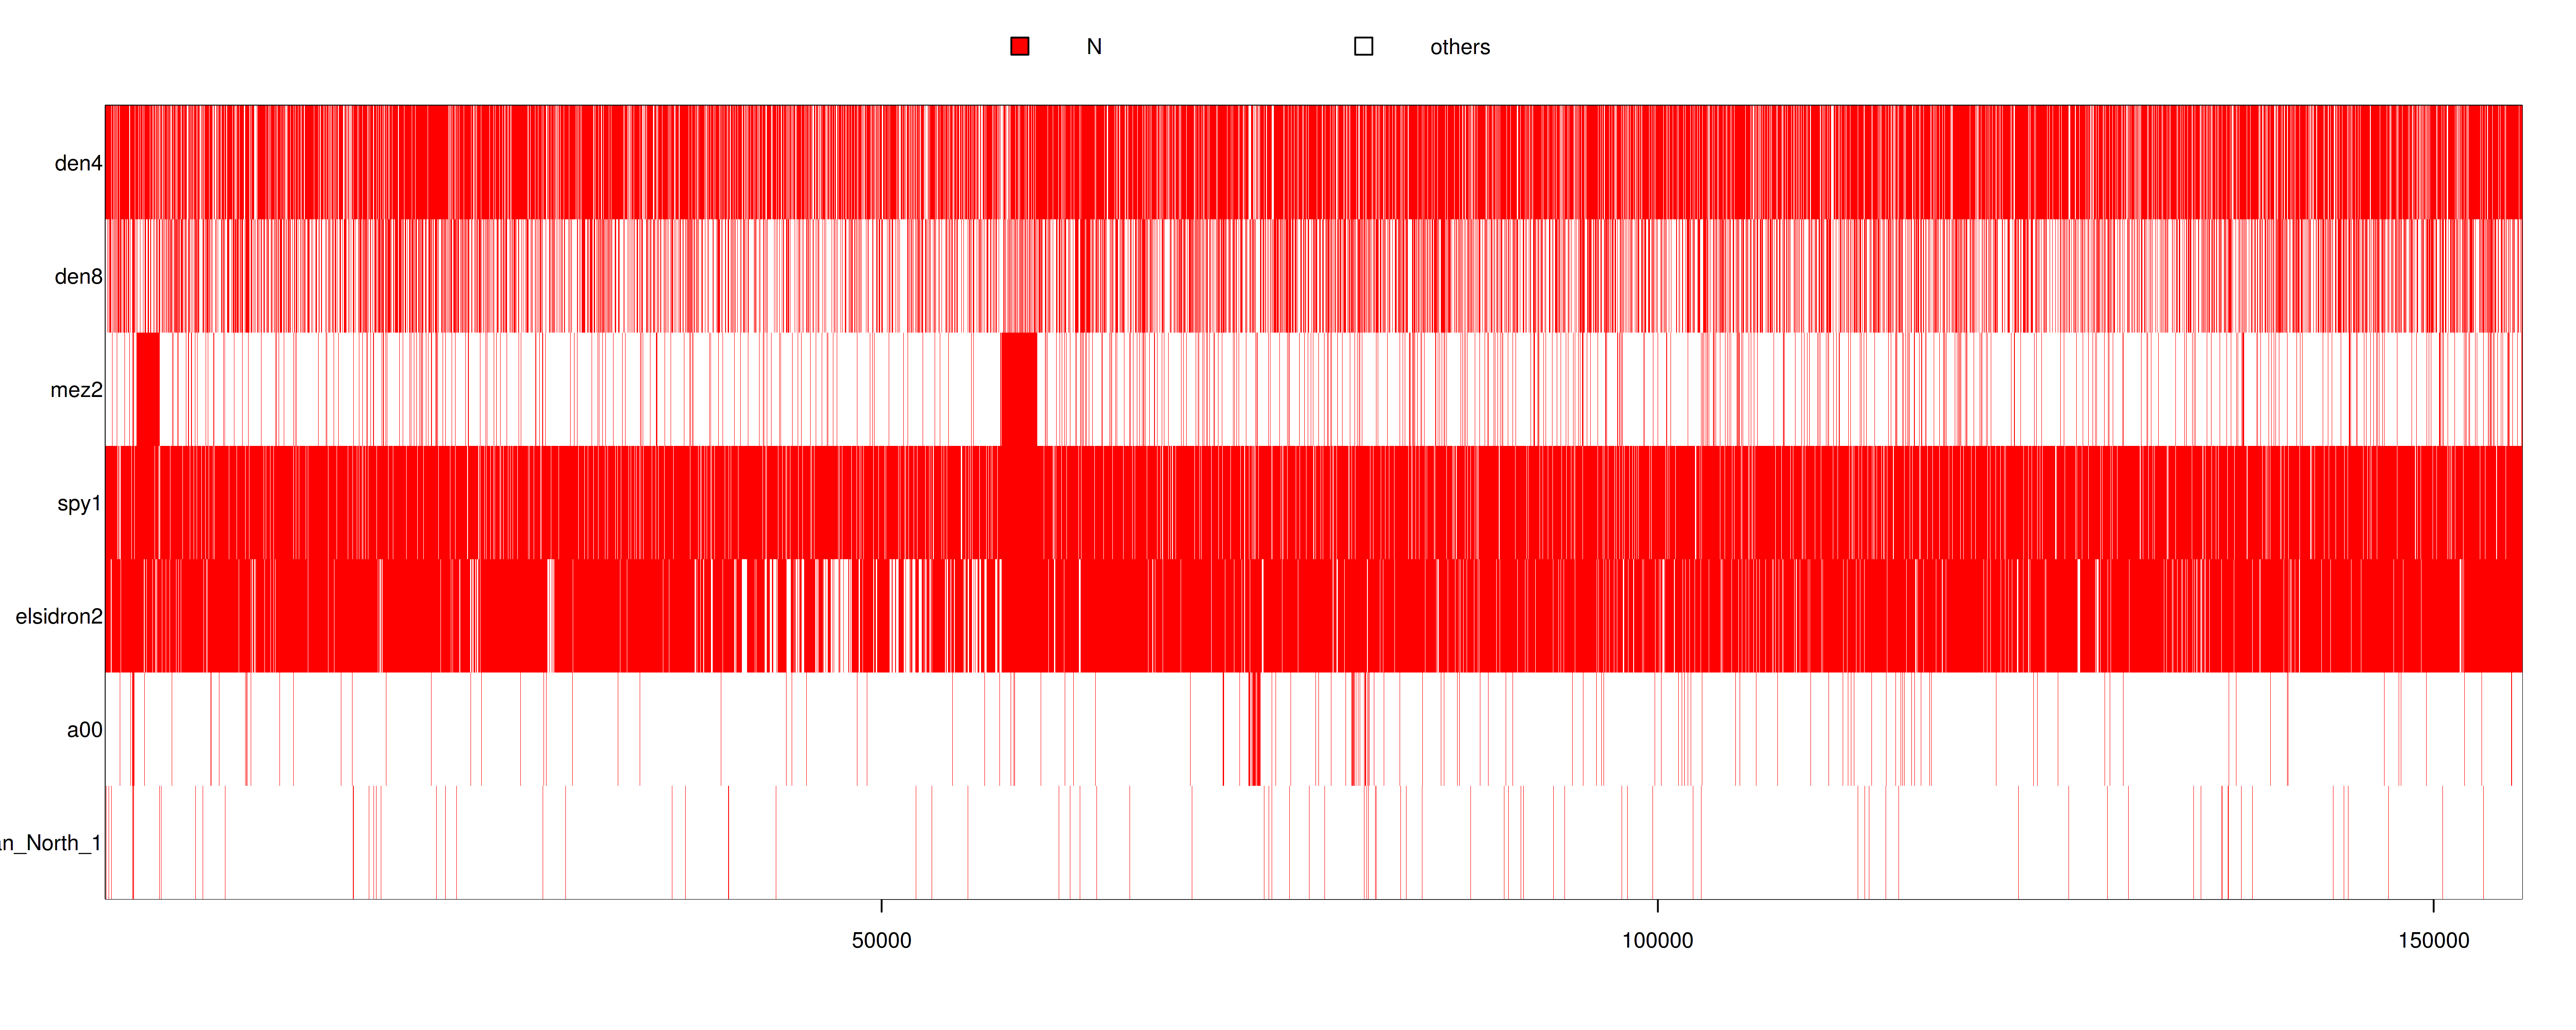

In [3]:
set_dim(20, 8)
aln_full[c("den4", "den8", "mez2", "spy1", "elsidron2", "a00", "S_Ju_hoan_North_1"), ] %>%
    image("N")

Zooming on a Neanderthal-specific deletion?

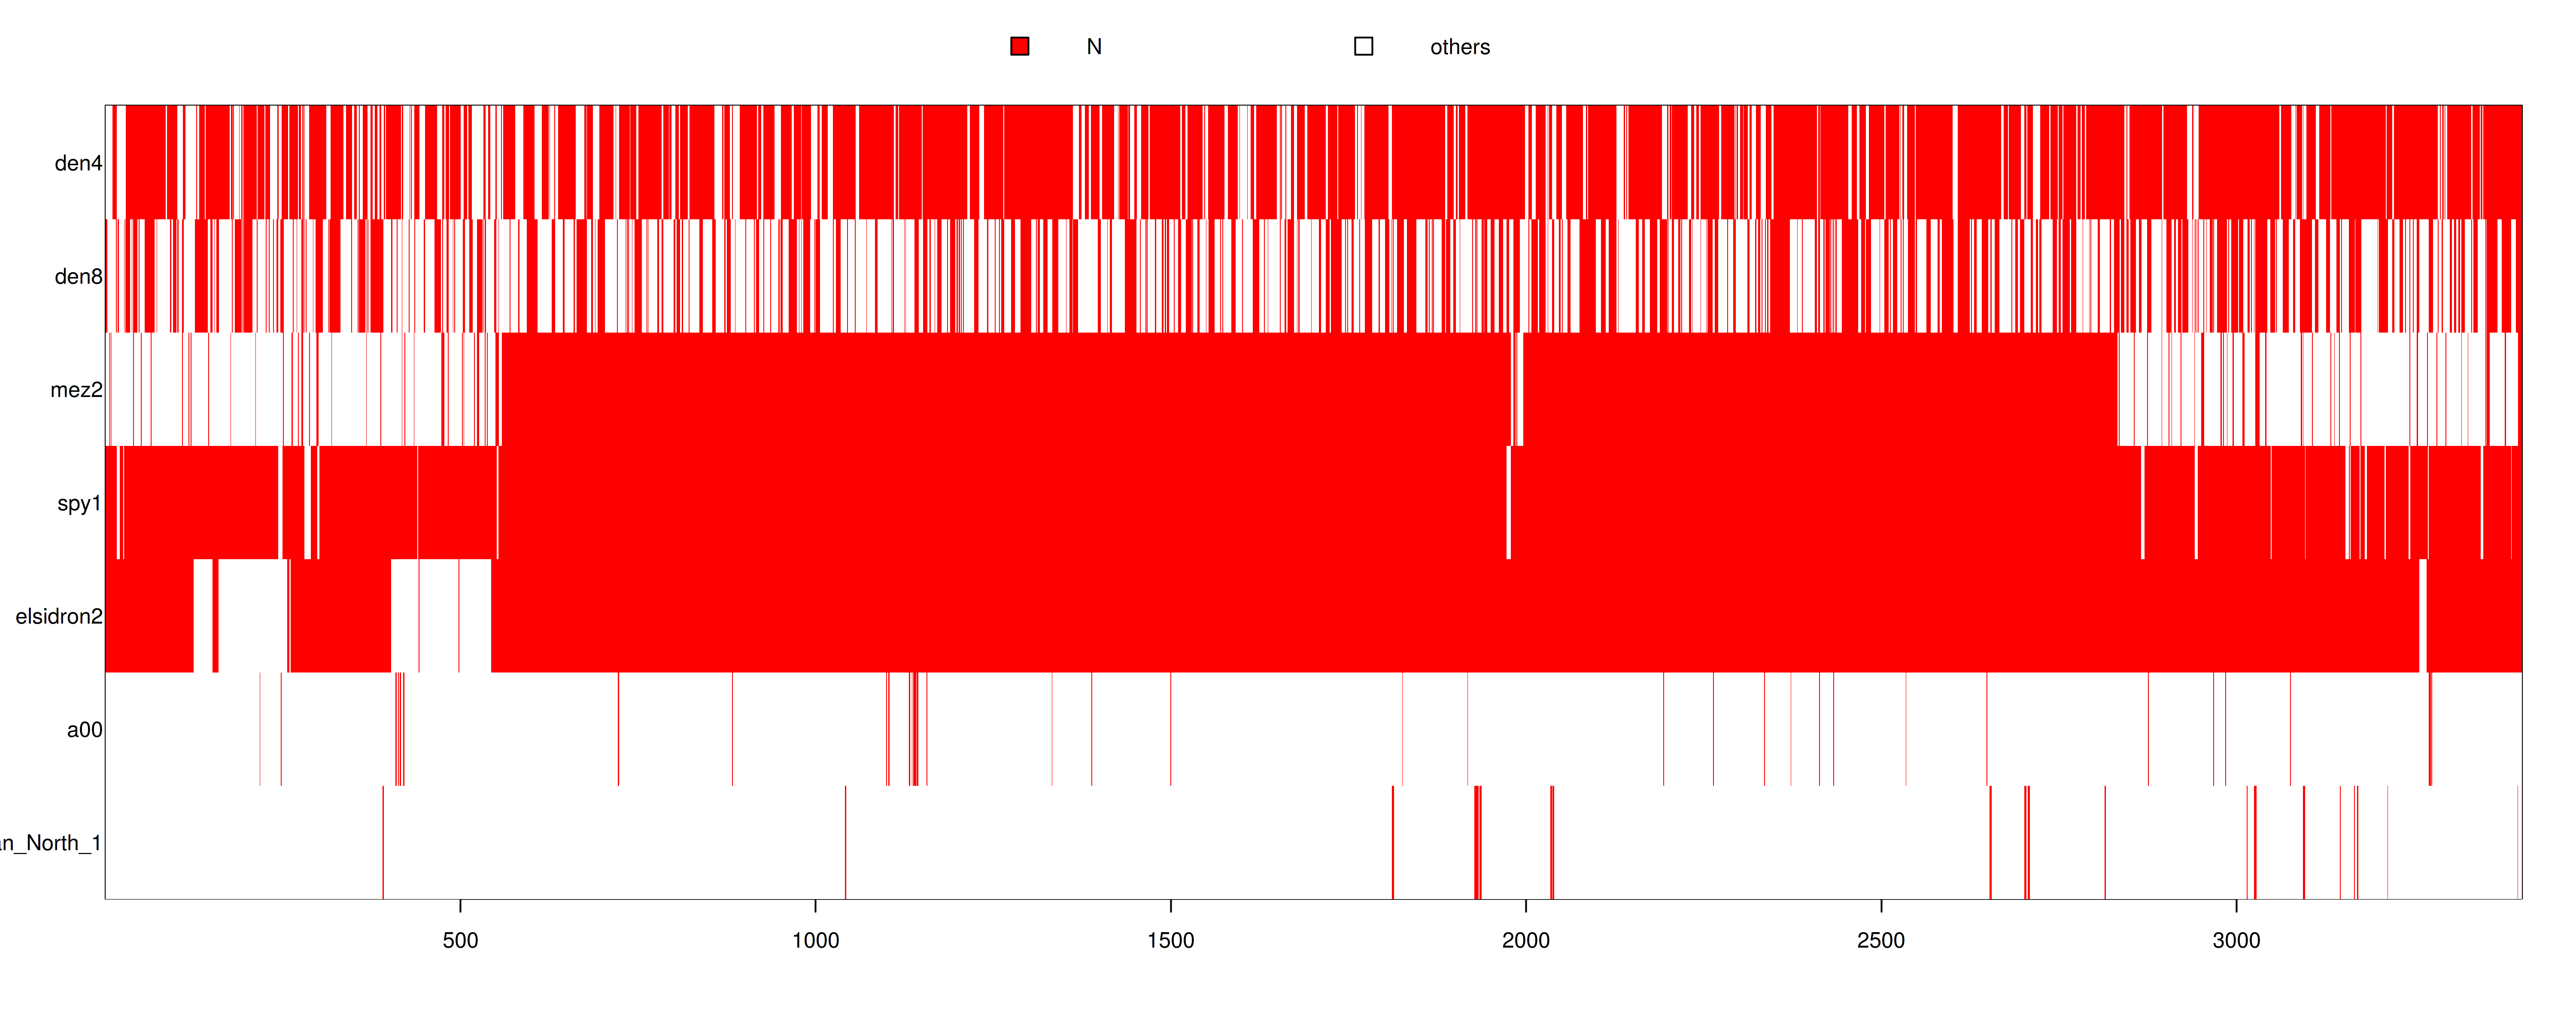

In [4]:
set_dim(20, 8)
aln_full[c("den4", "den8", "mez2", "spy1", "elsidron2", "a00", "S_Ju_hoan_North_1"), 57200:60600] %>%
    image("N")

### Pairwise distances vs Mezmaiskaya 2 using `dist.dna` from ape

Without pairwise deletion:

In [5]:
for (m in c("raw", "JC69", "F81", "K80")) {
    cat("Mez2 -", m, "\n")
    dist.dna(aln_full, model = m, pairwise.deletion = F) %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - raw 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.006024096       0.006024096       0.006024096       0.951807229 
Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.00604842        0.00604842        0.00604842               NaN 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.006049933       0.006049933       0.006049933               NaN 
Mez2 - K80 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.006051497       0.006051497       0.006051497               NaN 


With pairwise deletion:

In [6]:
for (m in c("raw", "JC69", "F81", "K80")) {
    cat("Mez2 -", m, "\n")
    dist.dna(aln_full, model = m, pairwise.deletion = T) %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - raw 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01311071        0.01316940        0.01621051        0.97067918 
Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322665        0.01328639        0.01638826               NaN 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01323391        0.01329372        0.01639943               NaN 
Mez2 - K80 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322704        0.01328684        0.01638912               NaN 


### Pairwise distances vs Mezmaiskaya 2 using `dist.ml` from phangorn

Only two molecular evolution models are implemented, JC69 and F81:

In [7]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "none") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322665        0.01328639        0.01638826       10.00000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01339240        0.01344852        0.01663434       10.00000000 


In [8]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "pairwise") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322665        0.01328639        0.01638826       10.00000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01339240        0.01344852        0.01663434       10.00000000 


In [9]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "all") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.00604842        0.00604842        0.00604842       10.00000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.006103251       0.006118860       0.006118860      10.000000000 


It seems that given that it's important to use pairwise deletion (due to the large number of missing sites in archaic Y chromosomes), any reasonable default model is fine here. The "vs-chimp" distances are giving NaN values for some `dist.dna` models and also are always fixed to a hardcoded value 10 by the `dist.ml` function. After looking at the code, this seems to be a default value for overflow situations, which is affecting both methods regardless of the molecular evolution model (except for models which are simply based on the proportion of matching alleles such as the "raw" option in `dist.dna`).

It's also quite interesting that the "raw" proportions of sites give the same values as those obtained by more sophisticated models. I suppose this makes sense given the relatively short evolutionary time scale I'm dealing with here.

**Note**: Yeah, so the man page for `dist.dna` clearly says that

> If the sequences are very different, most evolutionary distances are undefined and a non-finite value (Inf or NaN) is returned. You may do dist.dna(, model = "raw") to check whether some values are higher than 0.75.

The explanation for this magic number comes from the limitations of the substitution models and is quite obvious from looking at the distance equations:

More details [here](https://www.megasoftware.net/mega1_manual/Distance.html):
> The Jukes-Cantor distance can be computed if p < 0.75; otherwise it is not applicable because the argument of the logarithm becomes negative. 

From the [mailing list](https://r-sig-phylo.r-project.narkive.com/NjZMUVzZ/bootstrapping-with-boot-phylo):
> the correct distance for (say) the Jukes-Cantor model or the Kimura 2-parameter model when the sequences differ by more than 75% is (positive) infinity, since these are inferred to be unrelated sequences

> Most models ("K80", "JC69" etc.) are not defined for distances >=0.75 and will return Inf or NaN (the 0.75 can vary a bit, depending on the substitution model)

The reason for the above is obvious - to make the calculations more efficient I saved only variable sites during the VCF -> FASTA conversion. Naturally, though, the molecular models predict distances that are too large to be meaningful. I will stick to the "raw" proportion measure, because it gives pretty much the same distance values as the more sophisticated models anyway.

## Neighbor-joining tree

In [10]:
aln_full <- read.phyDat("../data/fasta/full_merged_nodmg.fa", format = "fasta")

aln_full$S_Ju_hoan_North_1 <- NULL
aln_full$S_Dinka_1 <- NULL
aln_full$S_Mbuti_1 <- NULL
aln_full$S_Gambian_1 <- NULL
aln_full$S_Mandenka_1 <- NULL
aln_full$S_Yoruba_2 <- NULL

aln_full <- as.DNAbin(aln_full)

In [11]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

It is possible to root the tree using the `root` function, but then ggtree struggles with assigning bootstrap values correctly. I.e., plotting the bootstraps with [`nodelabels()` function](http://ape-package.ird.fr/ape_faq.html#bootphylo) assigns bootstrap values to nodes correctly, but ggtree plots them in incorrect places. Both `root` and `midpoint` functions really give the same result (which can be verified by plotting the trees and bootstraps as given in the FAQ link above), but ggtree figures differ because of these misplaced bootstrap values. Instead of fixing the buggy plotting of bootstrap values by ggtree, I decided to call the midpoint function (which, in this situation, is actually "rooting using the chimp" anyway).

```buildtree_distdna_midpoint <- function(x) root(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))```

In [12]:
tr <- buildtree_distdna_midpoint(aln_full)
bp <- boot.phylo(tr, aln_full, buildtree_distdna_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [13]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin") %>%
    str_replace("El Sidrón 1253 \\(560 kb\\)", "El Sidrón 1253")

In [14]:
tr$edge.length

[1]  2.140431e-03 -8.771404e-04  5.006096e-04  8.165279e-04  1.658088e-03
 [6]  4.115582e-03  5.768194e-05  1.292165e-04  3.029998e-04  3.508697e-04
[11]  3.574444e-04  6.868006e-04  2.953007e-04  1.020485e-03  5.495507e-04
[16]  5.004786e-04  8.743690e-04  6.685751e-04  2.178071e-05  1.642225e-04
[21]  1.485522e-04  9.188530e-04  7.094087e-04  9.418529e-04  4.002269e-04
[26]  1.382218e-04  7.843944e-06  1.055441e-03  7.539882e-05  7.351306e-05
[31]  4.937336e-03  6.001388e-03  1.115849e-03  3.511879e-03  3.167054e-03
[36]  6.527101e-03  4.756620e-01  4.864565e-01

In [15]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [16]:
tr <- as.treedata(tr, bp)

Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [17]:
tr <- drop.tip(tr, tip = "chimp")

den_node <- getMRCA(as.phylo(tr), tip = c("Denisova 4", "Denisova 8"))
neand_node <- getMRCA(as.phylo(tr), tip = c("Spy 94a", "Mezmaiskaya 2"))
mezsidron_node <- getMRCA(as.phylo(tr), tip = c("El Sidrón 1253", "Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
nonafr_node <- getMRCA(as.phylo(tr), tip = c("Sardinian", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Denisova 8", "A00"))

In [18]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2", "El Sidrón 1253") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

In [19]:
save(den_node, neand_node, amh_node, amhneand_node, nonafr_node, root_node, mezsidron_node, tr, df,
     file = here("data/rds/phylogeny.RData"))

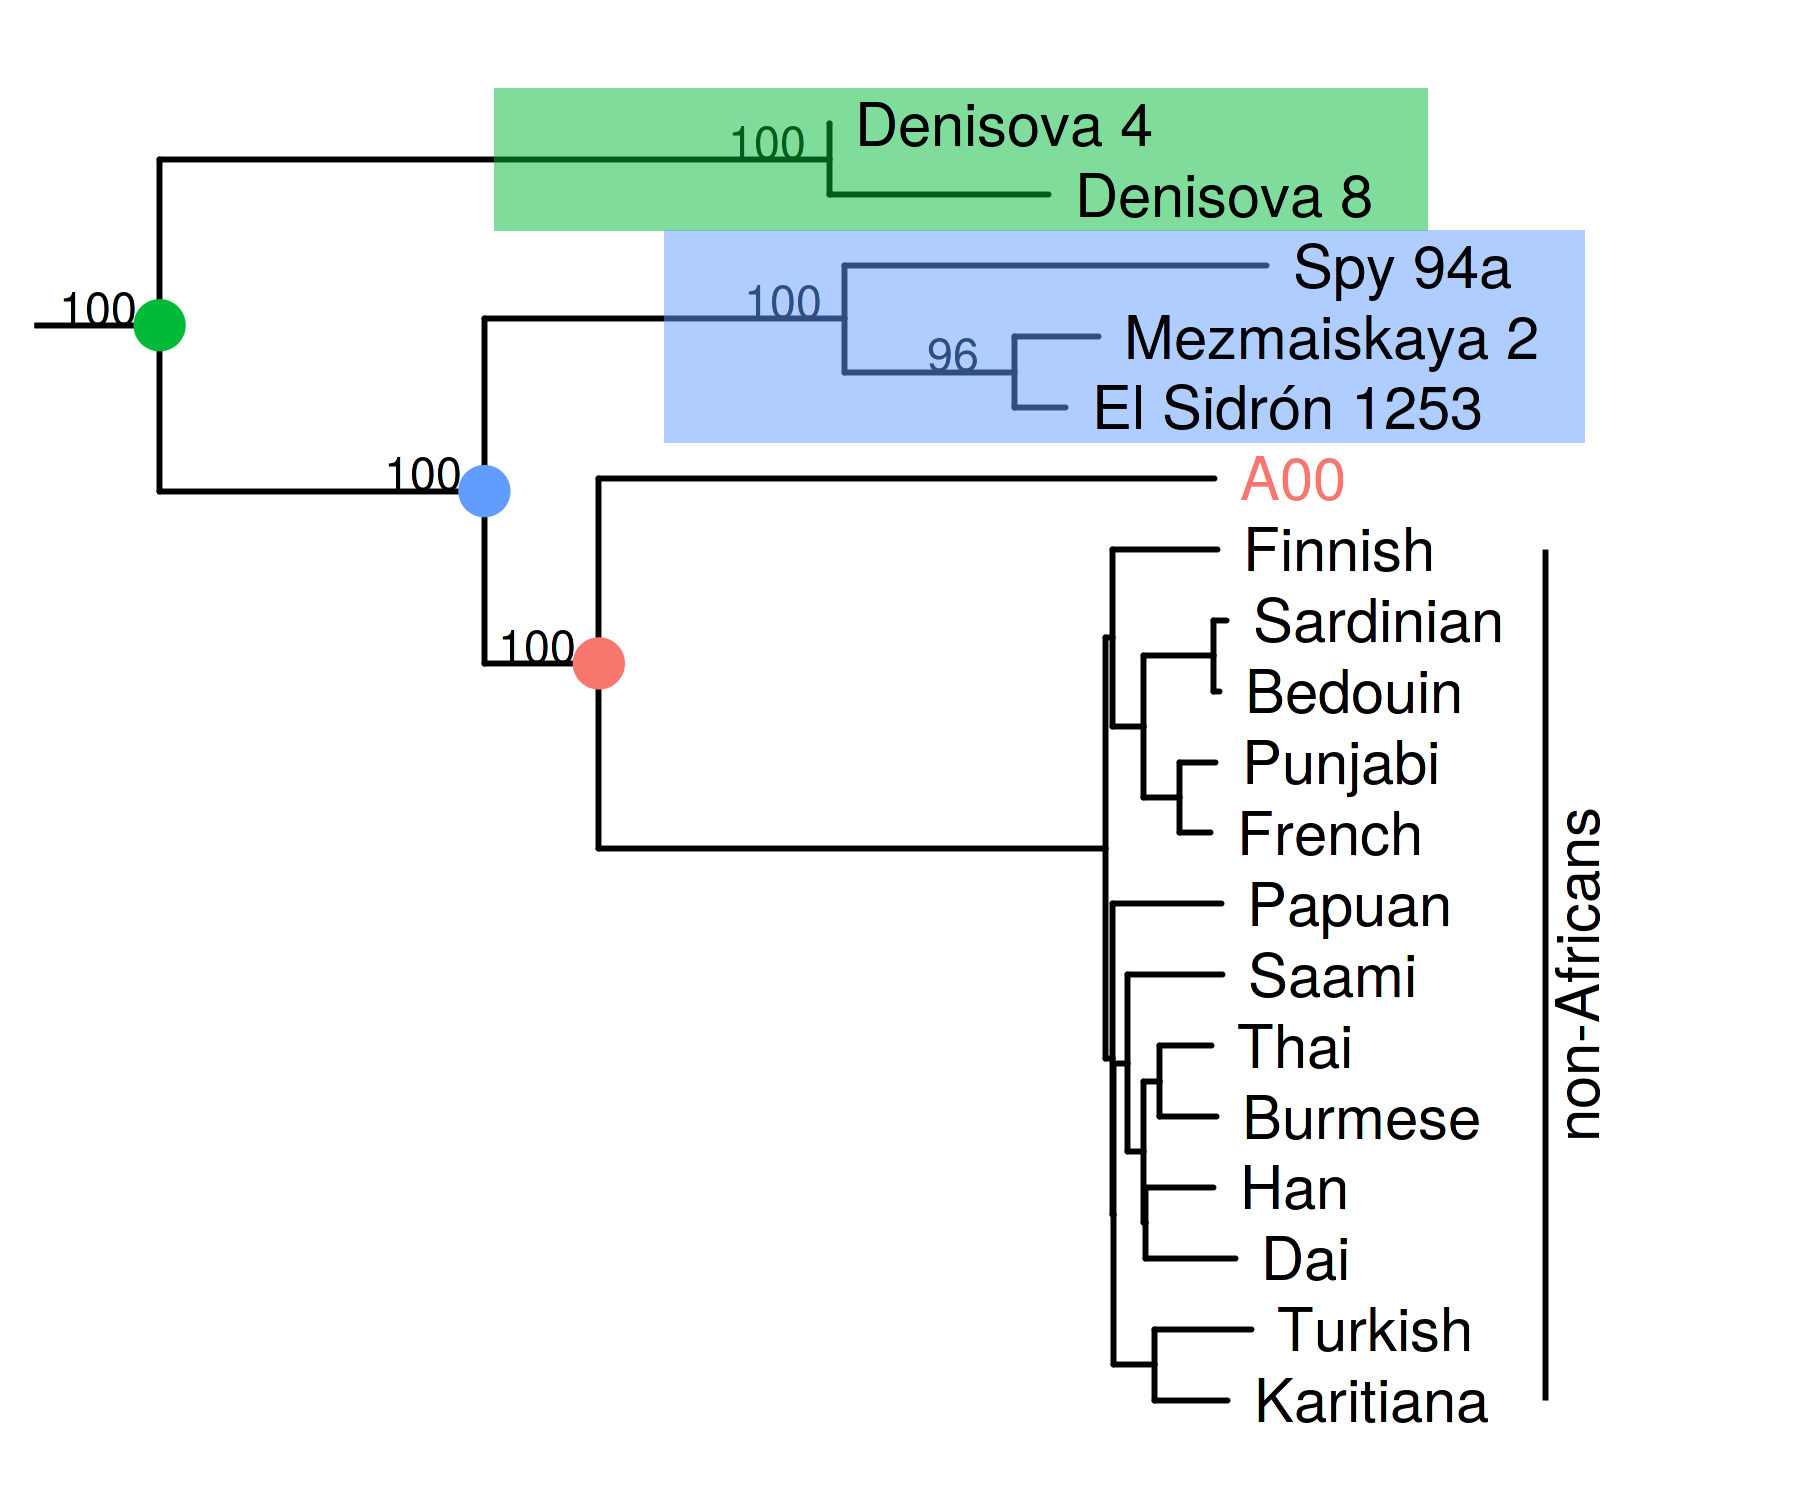

In [20]:
set_dim(6, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_text2(nudge_y = 0.25, nudge_x = -0.0006, aes(label = bootstrap,
               subset = node %in% c(den_node, neand_node, amh_node, amhneand_node, root_node, mezsidron_node))) +
    geom_hilight(node = den_node, fill = colors[2], extend = 0.0037) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.0031) +

    geom_cladelabel(offset.text = 0.0002, node = nonafr_node, angle = 90, hjust = "center",
                    offset = 0.0025, align = T, label = "non-Africans", fontsize = 5) +

    geom_rootedge(rootedge = root_node) +

    guides(color = F)

p %<+% df +
    geom_tiplab(aes(color = sample_name == "A00"), offset = 0.0002, size = 5) +
    geom_point2(aes(subset = node %in% c(amhneand_node, root_node, amh_node)), size = 5, color = colors[c(2, 3, 1)]) +
    scale_color_manual(values = c("black", colors[1])) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.015))

# Tree for the contamination analysis

In [21]:
aln_full <- read.phyDat(here("data/fasta/modern_var_full_merged.fa"), format = "fasta")

aln_full$S_Dinka_1 <- NULL
aln_full$S_Mbuti_1 <- NULL
aln_full$S_Gambian_1 <- NULL
aln_full$S_Mandenka_1 <- NULL
aln_full$S_Yoruba_2 <- NULL

aln_full <- as.DNAbin(aln_full)

In [22]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

In [23]:
tr <- buildtree_distdna_midpoint(aln_full)

In [24]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin")

In [25]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [26]:
tr <- drop.tip(tr, tip = "chimp")

In [27]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

In [28]:
ingroup <- c('Bedouin', 'Turkish', 'French', 'Burmese', 'Thai', 'Finnish', 'Sardinian',
             'Han', 'Dai', 'Punjabi', 'Saami', 'Papuan', 'Karitiana')

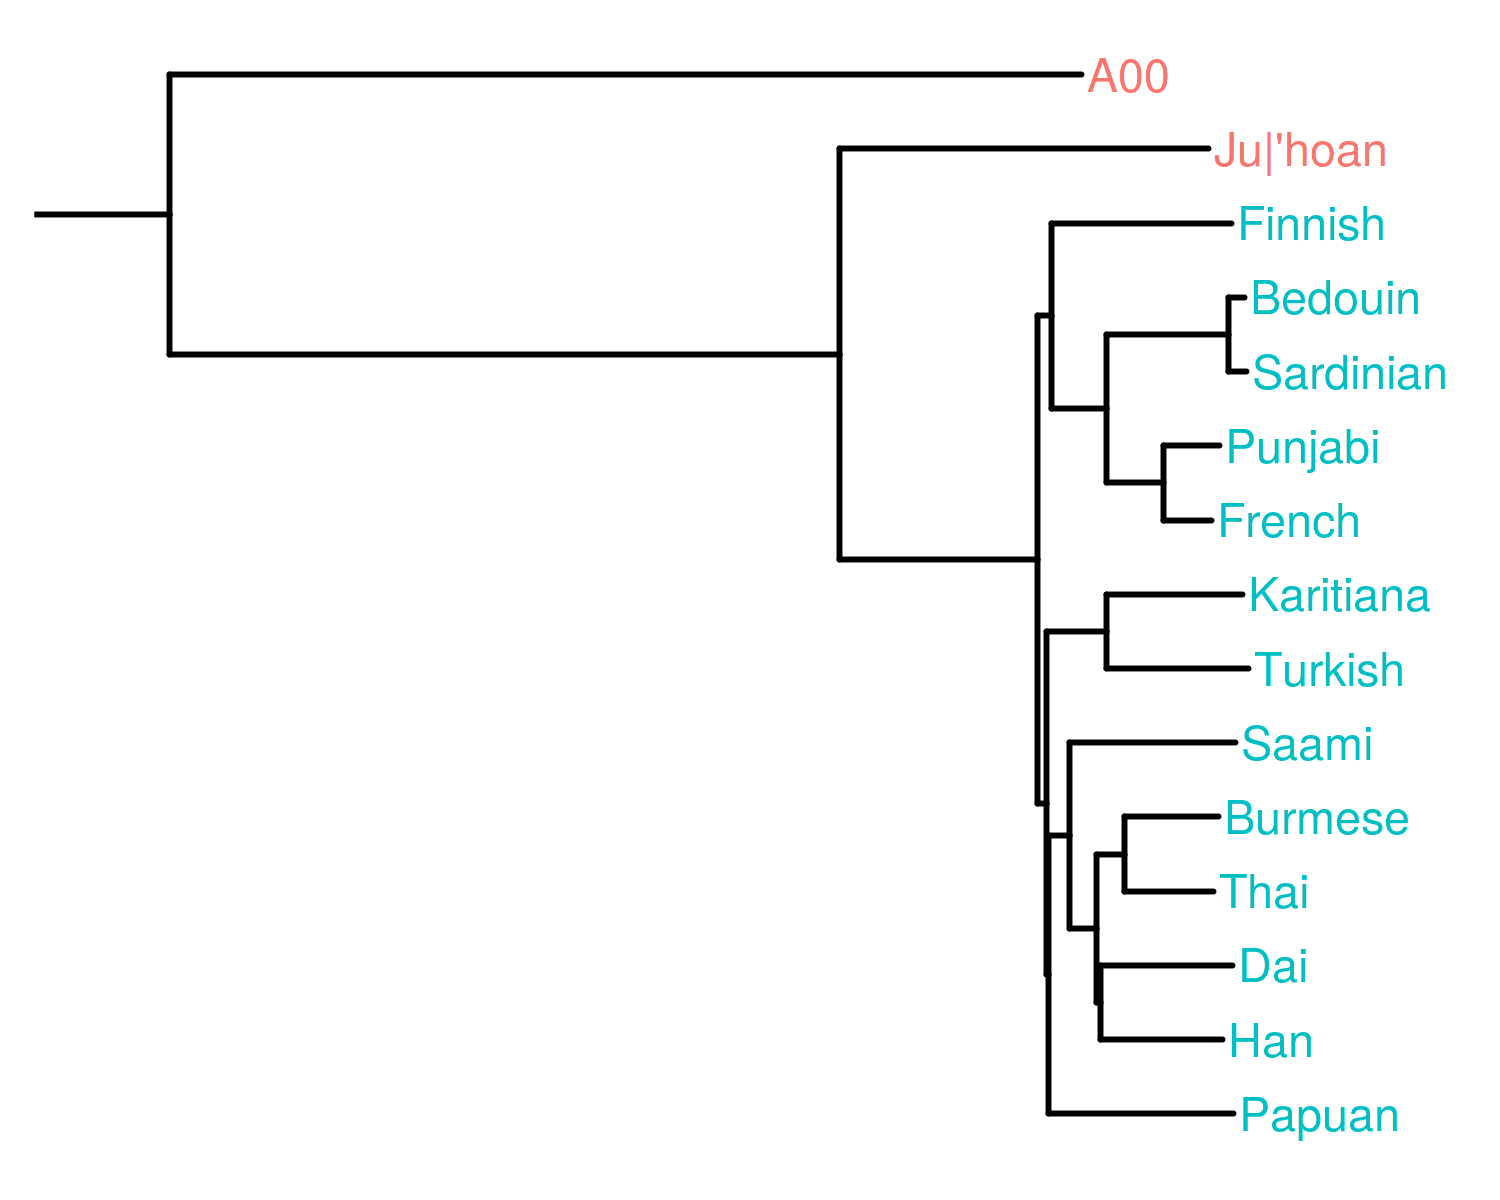

In [29]:
set_dim(5, 4)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_rootedge(rootedge = getMRCA(as.phylo(tr), c("A00", "Bedouin"))) +
    guides(color = F)

p %<+% df +
    geom_tiplab(aes(color = name %in% ingroup)) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.008))

### Distance matrices on all vs variable-sites-only data - investigating the Chimp distance problem above

Distance matrices using complete Y chromosome data:

In [30]:
x <- read.dna(here("data/fasta/modern_all_full_merged.fa"), format = "fasta")

In [31]:
for (m in c("raw", "JC69")) {
    cat(m, "\n")
    dist.dna(x, model = m, pairwise.deletion = F) %>% print
    cat("\n\n\n")
}

raw 
                  S_Mandenka_1    S_Saami_2      S_Han_2      S_Dai_2
S_Saami_2         1.047637e-04                                       
S_Han_2           1.043141e-04 5.980073e-05                          
S_Dai_2           1.058878e-04 6.182407e-05 4.923444e-05             
S_Burmese_1       1.047637e-04 6.025036e-05 4.900962e-05 5.148259e-05
S_Ju_hoan_North_1 1.537733e-04 1.519748e-04 1.515252e-04 1.535485e-04
S_Karitiana_1     1.088104e-04 7.283999e-05 7.239036e-05 7.396406e-05
S_Yoruba_2        1.551222e-05 1.049885e-04 1.045389e-04 1.061126e-04
S_Turkish_1       1.106089e-04 7.463851e-05 7.418888e-05 7.576258e-05
chimp             3.452705e-02 3.452840e-02 3.452705e-02 3.452728e-02
S_Punjabi_1       1.045389e-04 7.126629e-05 7.081666e-05 7.283999e-05
S_Sardinian_1     1.099344e-04 7.666184e-05 7.621221e-05 7.823555e-05
a00               4.006199e-04 3.992711e-04 3.988214e-04 4.003951e-04
S_Thai_1          1.036396e-04 5.912629e-05 4.788555e-05 5.035851e-05
S_Mbuti_1      

Distance matrices using variable-sites only Y chromosome data:

In [32]:
y <- read.dna(here("data/fasta/modern_var_full_merged.fa"), format = "fasta")

In [33]:
for (m in c("raw", "JC69")) {
    cat(m, "\n")
    dist.dna(y, model = m, pairwise.deletion = F) %>% print
    cat("\n\n\n")
}

raw 
                  S_Sardinian_1    S_Mbuti_1    S_Saami_2   S_Papuan_2
S_Mbuti_1          0.0031996832                                       
S_Saami_2          0.0021778283 0.0030527916                          
S_Papuan_2         0.0023311065 0.0031932966 0.0020820294             
a00                0.0114894813 0.0114575483 0.0113425896 0.0114830947
S_Gambian_1        0.0031422039 0.0005300872 0.0029953122 0.0031358173
S_Han_2            0.0021650551 0.0030400184 0.0016988338 0.0020692562
S_Ju_hoan_North_1  0.0044642287 0.0044450689 0.0043173370 0.0044706153
S_Dinka_1          0.0030591782 0.0024396786 0.0029122865 0.0030527916
S_Yoruba_2         0.0031294307 0.0005173141 0.0029825391 0.0031230441
S_BedouinB_1       0.0001979844 0.0032060698 0.0021842149 0.0023374931
chimp              0.9810126582 0.9809424057 0.9808913130 0.9809679521
S_Mandenka_1       0.0031230441 0.0003321028 0.0029761525 0.0031166575
S_French_1         0.0013347980 0.0030400184 0.0020181635 0.0021714417
S

The artifact is clearly caused by the fact we're running the analysis on variable-sites only data.

<br><br><br>
# Revisions

### Neighbor-joining tree without El Sidron 1253

The main figure tree is actually generated using pairwise deletion procedure, so the fact that El Sidron has only 560 kb sequence does not really matter for the overall tree. This is just repeating the same analysis (literally copying the same cells from above) without this individual to prove that the tree remains the same.

In [34]:
aln_full <- read.phyDat("../data/fasta/full_merged_nodmg.fa", format = "fasta")

aln_full$S_Ju_hoan_North_1 <- NULL
aln_full$S_Dinka_1 <- NULL
aln_full$S_Mbuti_1 <- NULL
aln_full$S_Gambian_1 <- NULL
aln_full$S_Mandenka_1 <- NULL
aln_full$S_Yoruba_2 <- NULL

# remove El Sidron
aln_full$elsidron2 <- NULL

aln_full <- as.DNAbin(aln_full)

In [35]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

It is possible to root the tree using the `root` function, but then the ggtree struggles with assigning bootstrap values correctly. I.e., plotting the bootstraps with [`nodelabels()` function](http://ape-package.ird.fr/ape_faq.html#bootphylo) is assigning bootstrap values to nodes correctly, but ggtree plots them in incorrect places. Both `root` and `midpoint` functions really give the same result (which can be verified by plotting the trees and bootstraps as given in the FAQ link above), but ggtree figures differ because of these misplaced bootstrap values. Instead of convincing ggtree to do the right thing, I decided to simply go with midpoint rooting.

```buildtree_distdna_midpoint <- function(x) root(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))```

In [36]:
tr <- buildtree_distdna_midpoint(aln_full)
bp <- boot.phylo(tr, aln_full, buildtree_distdna_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [37]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin") %>%
    str_replace("El Sidrón 1253 \\(560 kb\\)", "El Sidrón 1253")

In [38]:
tr$edge.length

[1]  2.179468e-03 -9.161771e-04  3.822514e-03  2.216026e-03  5.795207e-05
 [6]  1.289464e-04  3.030101e-04  3.508594e-04  3.565827e-04  6.876623e-04
[11]  2.943254e-04  1.021460e-03  5.497981e-04  5.002311e-04  8.765658e-04
[16]  6.663784e-04  2.327890e-05  1.627243e-04  1.451369e-04  9.222683e-04
[21]  1.370567e-04  1.059731e-03  7.199051e-04  9.313565e-04  3.650569e-04
[26]  3.988896e-05  4.944417e-05  8.878604e-05  4.762231e-03  6.180681e-03
[31]  1.023612e-03  3.989385e-03  3.412971e-03  6.551960e-03  4.754344e-01
[36]  4.866592e-01

In [39]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [40]:
tr <- as.treedata(tr, bp)

In [41]:
tr <- drop.tip(tr, tip = "chimp")

den_node <- getMRCA(as.phylo(tr), tip = c("Denisova 4", "Denisova 8"))
neand_node <- getMRCA(as.phylo(tr), tip = c("Spy 94a", "Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
nonafr_node <- getMRCA(as.phylo(tr), tip = c("Sardinian", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Denisova 8", "A00"))

In [42]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2", "El Sidrón 1253") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

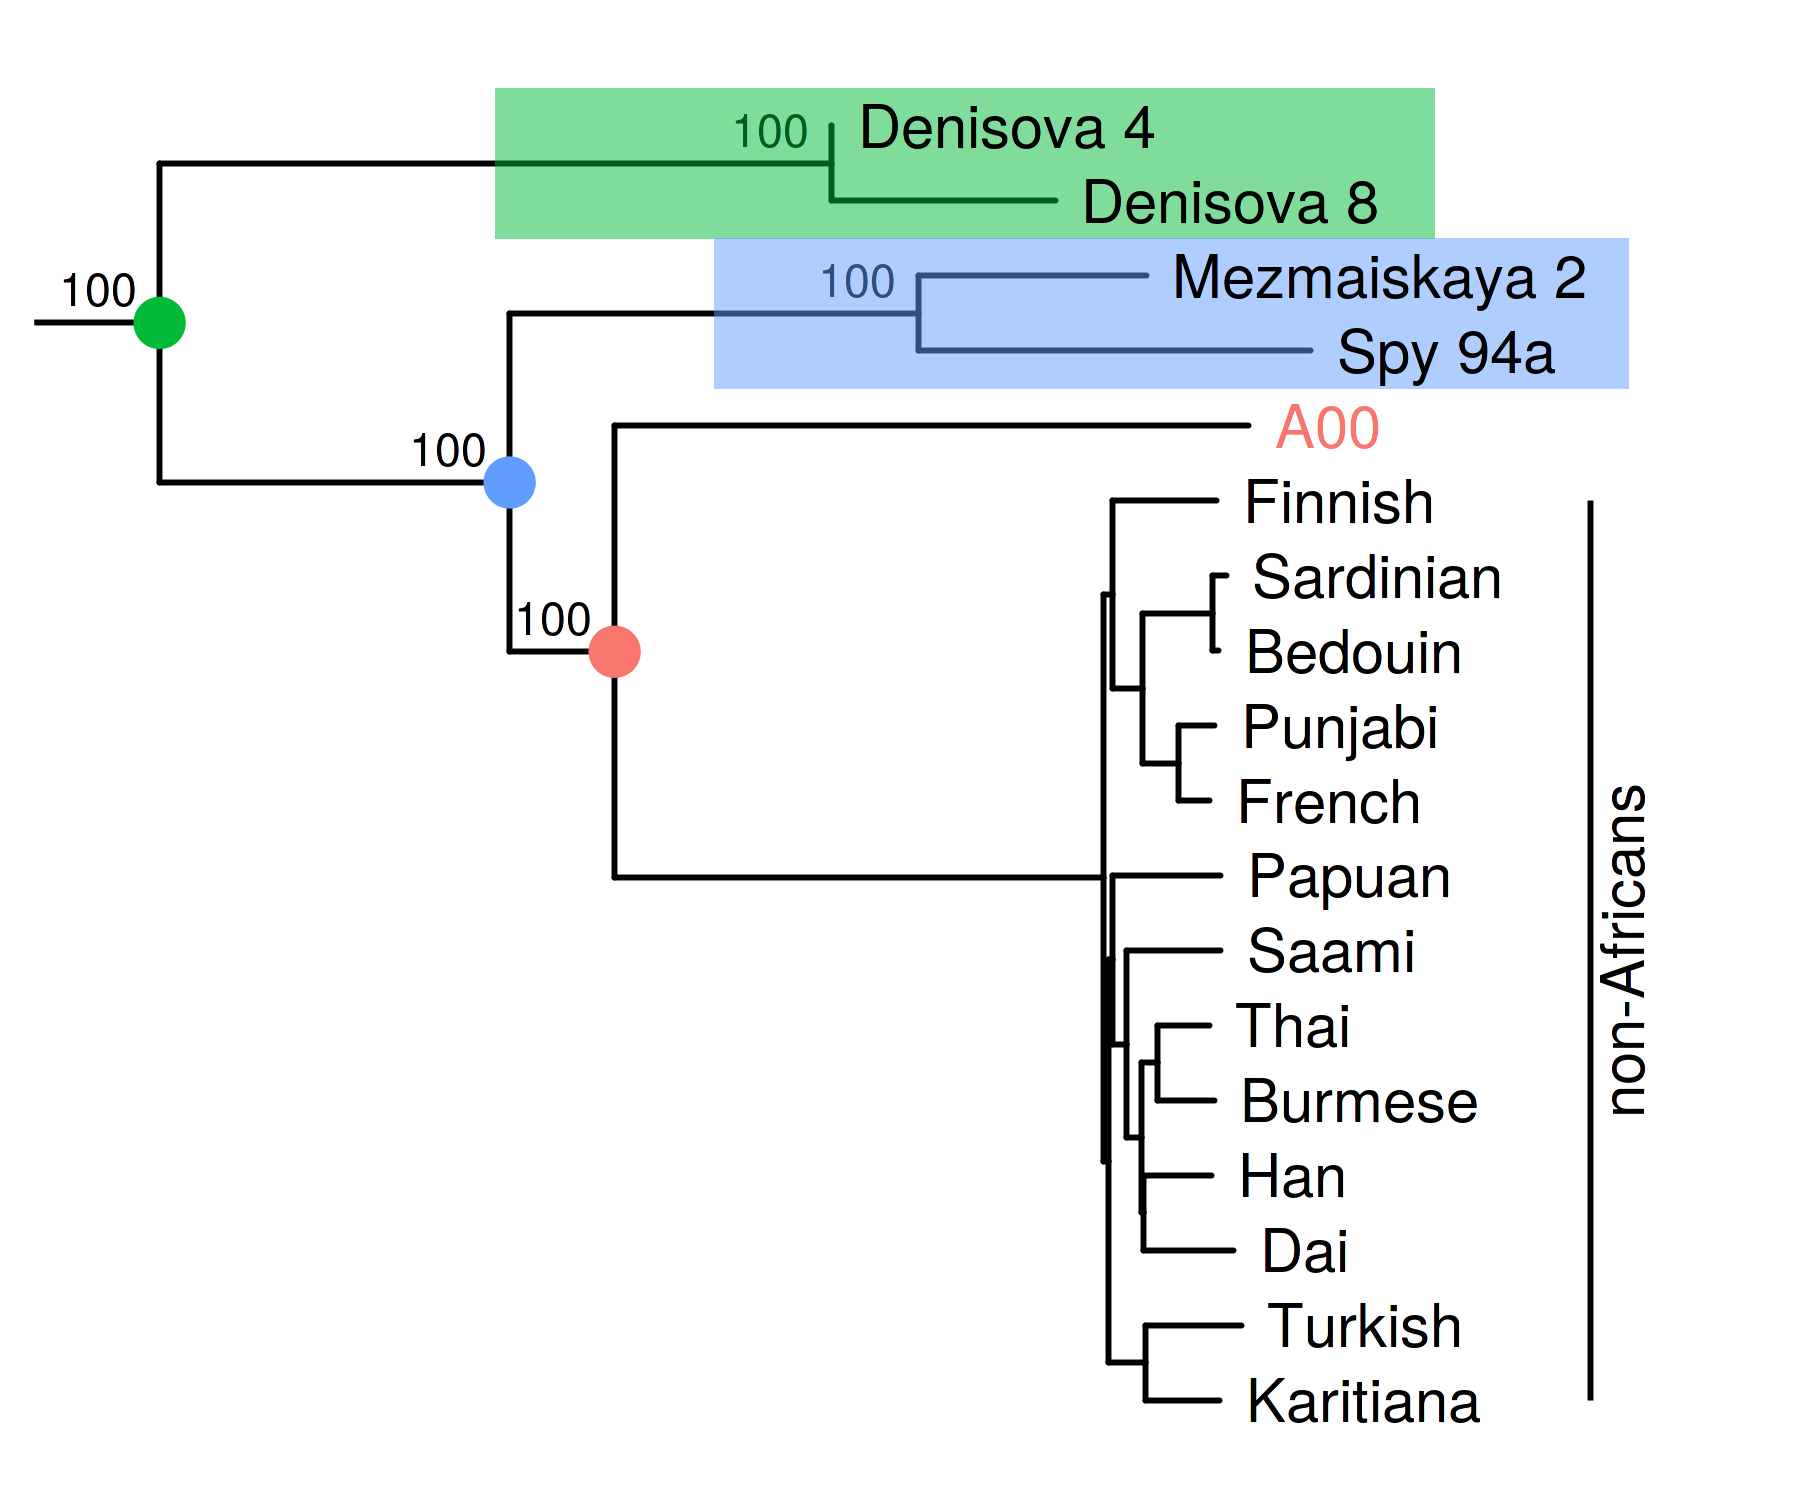

In [43]:
set_dim(6, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_text2(nudge_y = 0.45, nudge_x = -0.0006, aes(label = bootstrap,
               subset = node %in% c(den_node, neand_node, amh_node, amhneand_node, root_node))) +
    geom_hilight(node = den_node, fill = colors[2], extend = 0.0037) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.0031) +

    geom_cladelabel(offset.text = 0.0002, node = nonafr_node, angle = 90, hjust = "center",
                    offset = 0.0025, align = T, label = "non-Africans", fontsize = 5) +

    geom_rootedge(rootedge = root_node) +

    guides(color = F)

p %<+% df +
    geom_tiplab(aes(color = sample_name == "A00"), offset = 0.0002, size = 5) +
    geom_point2(aes(subset = node %in% c(amhneand_node, root_node, amh_node)), size = 5, color = colors[c(2, 3, 1)]) +
    scale_color_manual(values = c("black", colors[1])) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.015))

### Neighbor-joining tree without pairwise deletion

In [2]:
aln_full <- read.phyDat("../data/fasta/full_merged_nodmg.fa", format = "fasta")

aln_full$S_Ju_hoan_North_1 <- NULL
aln_full$S_Dinka_1 <- NULL
aln_full$S_Mbuti_1 <- NULL
aln_full$S_Gambian_1 <- NULL
aln_full$S_Mandenka_1 <- NULL
aln_full$S_Yoruba_2 <- NULL

# remove El Sidron
aln_full$elsidron2 <- NULL

aln_full <- as.DNAbin(aln_full)

In [3]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = F)))

It is possible to root the tree using the `root` function, but then the ggtree struggles with assigning bootstrap values correctly. I.e., plotting the bootstraps with [`nodelabels()` function](http://ape-package.ird.fr/ape_faq.html#bootphylo) is assigning bootstrap values to nodes correctly, but ggtree plots them in incorrect places. Both `root` and `midpoint` functions really give the same result (which can be verified by plotting the trees and bootstraps as given in the FAQ link above), but ggtree figures differ because of these misplaced bootstrap values. Instead of convincing ggtree to do the right thing, I decided to simply go with midpoint rooting.

```buildtree_distdna_midpoint <- function(x) root(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))```

In [4]:
tr <- buildtree_distdna_midpoint(aln_full)
bp <- boot.phylo(tr, aln_full, buildtree_distdna_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [5]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin") %>%
    str_replace("El Sidrón 1253 \\(560 kb\\)", "El Sidrón 1253")

In [6]:
tr$edge.length

[1]  6.530724e-18 -6.530724e-18  3.858025e-03  7.716049e-04 -2.478176e-19
 [6]  2.478176e-19  0.000000e+00  0.000000e+00  1.897354e-18  7.716049e-04
[11]  8.673617e-19  2.314815e-03  2.314815e-03  2.314815e-03  0.000000e+00
[16]  7.716049e-04  0.000000e+00  7.716049e-04  1.084202e-19  7.716049e-04
[21] -2.710505e-19  1.626303e-19  1.626303e-19 -1.517883e-19  2.103352e-18
[26]  7.716049e-04  2.710505e-18  2.314815e-03  7.806256e-18  1.543210e-03
[31]  3.858025e-04  1.929012e-03  2.700617e-03  2.363040e-03  4.810716e-01
[36]  4.903308e-01

In [7]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [8]:
tr <- as.treedata(tr, bp)

Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [9]:
tr <- drop.tip(tr, tip = "chimp")

den_node <- getMRCA(as.phylo(tr), tip = c("Denisova 4", "Denisova 8"))
neand_node <- getMRCA(as.phylo(tr), tip = c("Spy 94a", "Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
nonafr_node <- getMRCA(as.phylo(tr), tip = c("Sardinian", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Denisova 8", "A00"))

In [10]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2", "El Sidrón 1253") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

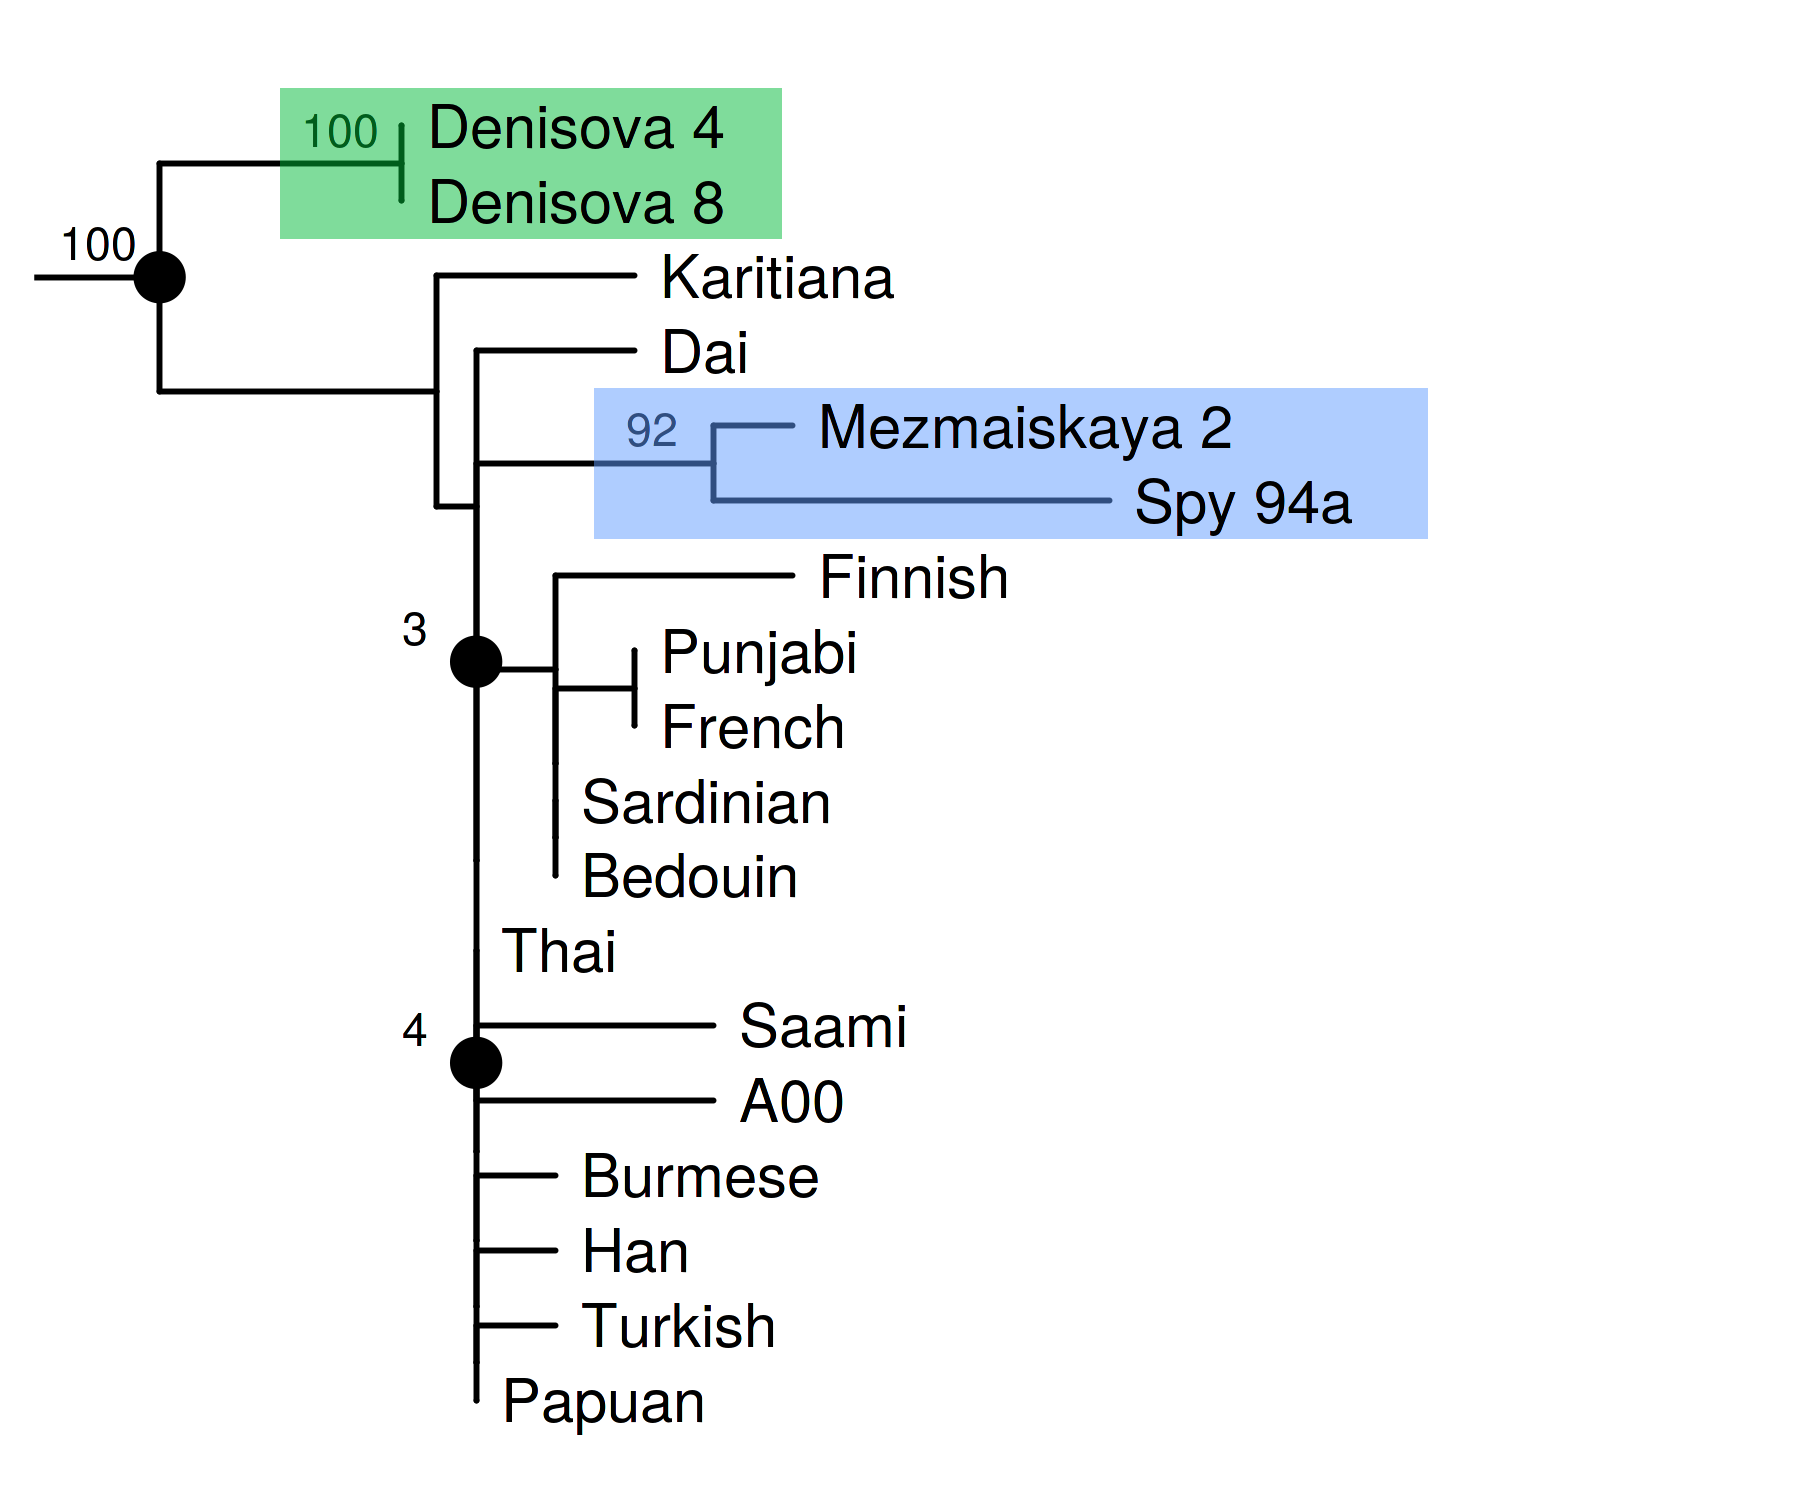

In [11]:
set_dim(6, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_text2(nudge_y = 0.45, nudge_x = -0.0006, aes(label = bootstrap,
               subset = node %in% c(den_node, neand_node, amh_node, amhneand_node, root_node))) +
    geom_hilight(node = den_node, fill = colors[2], extend = 0.0037) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.0031) +

    geom_rootedge(rootedge = root_node) +

    guides(color = F)

p %<+% df +
    geom_tiplab(offset = 0.0002, size = 5) +
    geom_point2(aes(subset = node %in% c(amhneand_node, root_node, amh_node)), size = 5) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.015))

### Neighbor-joining tree without Spy 94a (and no pairwise deletion)

In [12]:
aln_full <- read.phyDat("../data/fasta/full_merged_nodmg.fa", format = "fasta")

aln_full$S_Ju_hoan_North_1 <- NULL
aln_full$S_Dinka_1 <- NULL
aln_full$S_Mbuti_1 <- NULL
aln_full$S_Gambian_1 <- NULL
aln_full$S_Mandenka_1 <- NULL
aln_full$S_Yoruba_2 <- NULL

# remove El Sidron
aln_full$elsidron2 <- NULL
aln_full$spy1 <- NULL

aln_full <- as.DNAbin(aln_full)

In [13]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = F)))

It is possible to root the tree using the `root` function, but then the ggtree struggles with assigning bootstrap values correctly. I.e., plotting the bootstraps with [`nodelabels()` function](http://ape-package.ird.fr/ape_faq.html#bootphylo) is assigning bootstrap values to nodes correctly, but ggtree plots them in incorrect places. Both `root` and `midpoint` functions really give the same result (which can be verified by plotting the trees and bootstraps as given in the FAQ link above), but ggtree figures differ because of these misplaced bootstrap values. Instead of convincing ggtree to do the right thing, I decided to simply go with midpoint rooting.

```buildtree_distdna_midpoint <- function(x) root(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))```

In [14]:
tr <- buildtree_distdna_midpoint(aln_full)
bp <- boot.phylo(tr, aln_full, buildtree_distdna_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [15]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin") %>%
    str_replace("El Sidrón 1253 \\(560 kb\\)", "El Sidrón 1253")

In [16]:
tr$edge.length

[1]  1.391982e-04  9.047884e-04  6.949036e-04  4.882812e-04  1.391982e-04
 [6]  1.391982e-04  1.391982e-04  1.391982e-04  3.479955e-04  4.175947e-04
[11]  2.783964e-04  9.743875e-04  7.643474e-04  4.188375e-04  8.351893e-04
[16]  1.043987e-03 -1.084202e-19  2.087973e-04  5.437430e-07  6.905537e-05
[21]  6.905537e-05  2.090692e-04  1.903101e-06  1.374582e-04  6.089922e-06
[26]  1.315133e-03  1.016437e-03  4.962952e-03  5.005782e-04  4.598513e-03
[31]  2.500597e-03  3.707313e-03  4.807665e-01  4.887306e-01

In [17]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [18]:
tr <- as.treedata(tr, bp)

In [19]:
tr <- drop.tip(tr, tip = "chimp")

den_node <- getMRCA(as.phylo(tr), tip = c("Denisova 4", "Denisova 8"))
neand_node <- getMRCA(as.phylo(tr), tip = c("Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
nonafr_node <- getMRCA(as.phylo(tr), tip = c("Sardinian", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Denisova 8", "A00"))

In [20]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2", "El Sidrón 1253") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

Warning message in min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(y, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(y, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_hilight()`:
arguments imply differing number of rows: 0, 1”


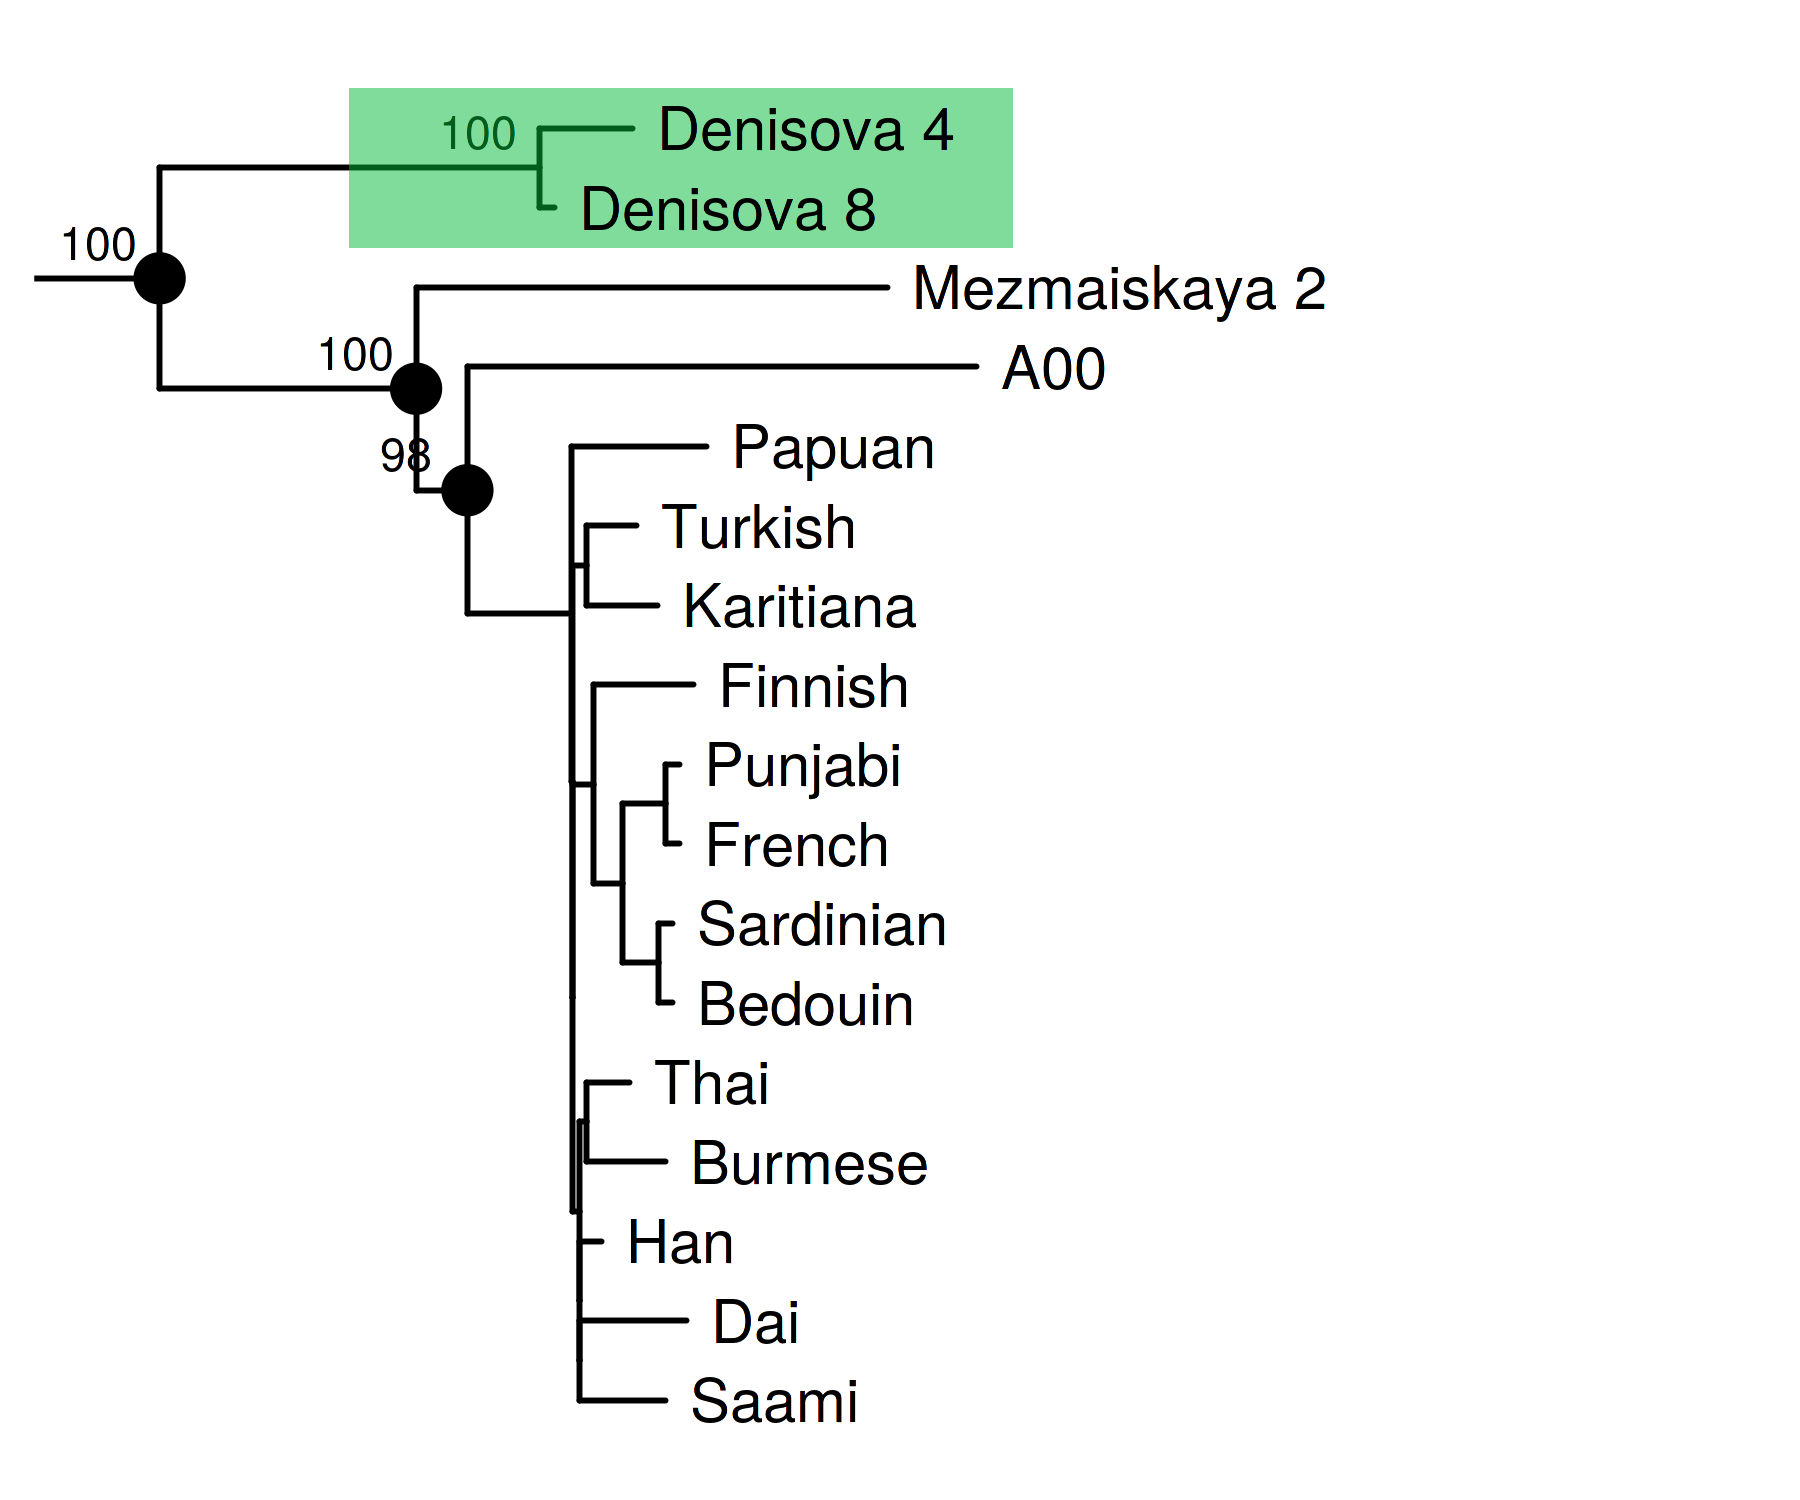

In [21]:
set_dim(6, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_text2(nudge_y = 0.45, nudge_x = -0.0006, aes(label = bootstrap,
               subset = node %in% c(den_node, neand_node, amh_node, amhneand_node, root_node))) +
    geom_hilight(node = den_node, fill = colors[2], extend = 0.0037) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.0031) +

    geom_rootedge(rootedge = root_node) +

    guides(color = F)

p %<+% df +
    geom_tiplab(offset = 0.0002, size = 5) +
    geom_point2(aes(subset = node %in% c(amhneand_node, root_node, amh_node)), size = 5) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.015))

### Neighbor-joining tree without Denisova 4 (and no pairwise deletion)

In [34]:
aln_full <- read.phyDat("../data/fasta/full_merged_nodmg.fa", format = "fasta")

aln_full$S_Ju_hoan_North_1 <- NULL
aln_full$S_Dinka_1 <- NULL
aln_full$S_Mbuti_1 <- NULL
aln_full$S_Gambian_1 <- NULL
aln_full$S_Mandenka_1 <- NULL
aln_full$S_Yoruba_2 <- NULL

# remove El Sidron
aln_full$elsidron2 <- NULL
aln_full$den4 <- NULL

aln_full <- as.DNAbin(aln_full)

In [35]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = F)))

It is possible to root the tree using the `root` function, but then the ggtree struggles with assigning bootstrap values correctly. I.e., plotting the bootstraps with [`nodelabels()` function](http://ape-package.ird.fr/ape_faq.html#bootphylo) is assigning bootstrap values to nodes correctly, but ggtree plots them in incorrect places. Both `root` and `midpoint` functions really give the same result (which can be verified by plotting the trees and bootstraps as given in the FAQ link above), but ggtree figures differ because of these misplaced bootstrap values. Instead of convincing ggtree to do the right thing, I decided to simply go with midpoint rooting.

```buildtree_distdna_midpoint <- function(x) root(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))```

In [36]:
tr <- buildtree_distdna_midpoint(aln_full)
bp <- boot.phylo(tr, aln_full, buildtree_distdna_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [37]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin") %>%
    str_replace("El Sidrón 1253 \\(560 kb\\)", "El Sidrón 1253")

In [38]:
tr$edge.length

[1] 3.785452e-03 1.020529e-03 8.949409e-04 8.850520e-04 5.339979e-04
 [6] 3.559986e-04 1.779993e-04 8.899964e-04 4.449982e-06 1.735493e-04
[11] 2.032879e-19 1.779993e-04 1.779993e-04 1.779993e-04 7.119972e-04
[16] 8.899964e-04 7.453890e-19 1.779993e-04 5.339979e-04 1.779993e-04
[21] 1.409463e-18 1.245995e-03 5.562478e-06 1.724368e-04 1.668743e-05
[26] 1.226526e-03 1.131964e-03 4.371252e-03 3.457294e-04 1.544780e-03
[31] 4.329197e-03 4.995105e-03 4.778988e-01 4.875582e-01

In [39]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [40]:
tr <- as.treedata(tr, bp)

In [41]:
tr <- drop.tip(tr, tip = "chimp")

den_node <- getMRCA(as.phylo(tr), tip = c("Denisova 8"))
neand_node <- getMRCA(as.phylo(tr), tip = c("Spy 94a", "Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
nonafr_node <- getMRCA(as.phylo(tr), tip = c("Sardinian", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Denisova 8", "A00"))

In [42]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2", "El Sidrón 1253") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

Warning message in min(x, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(x, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in min(y, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(y, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Computation failed in `stat_hilight()`:
arguments imply differing number of rows: 0, 1”


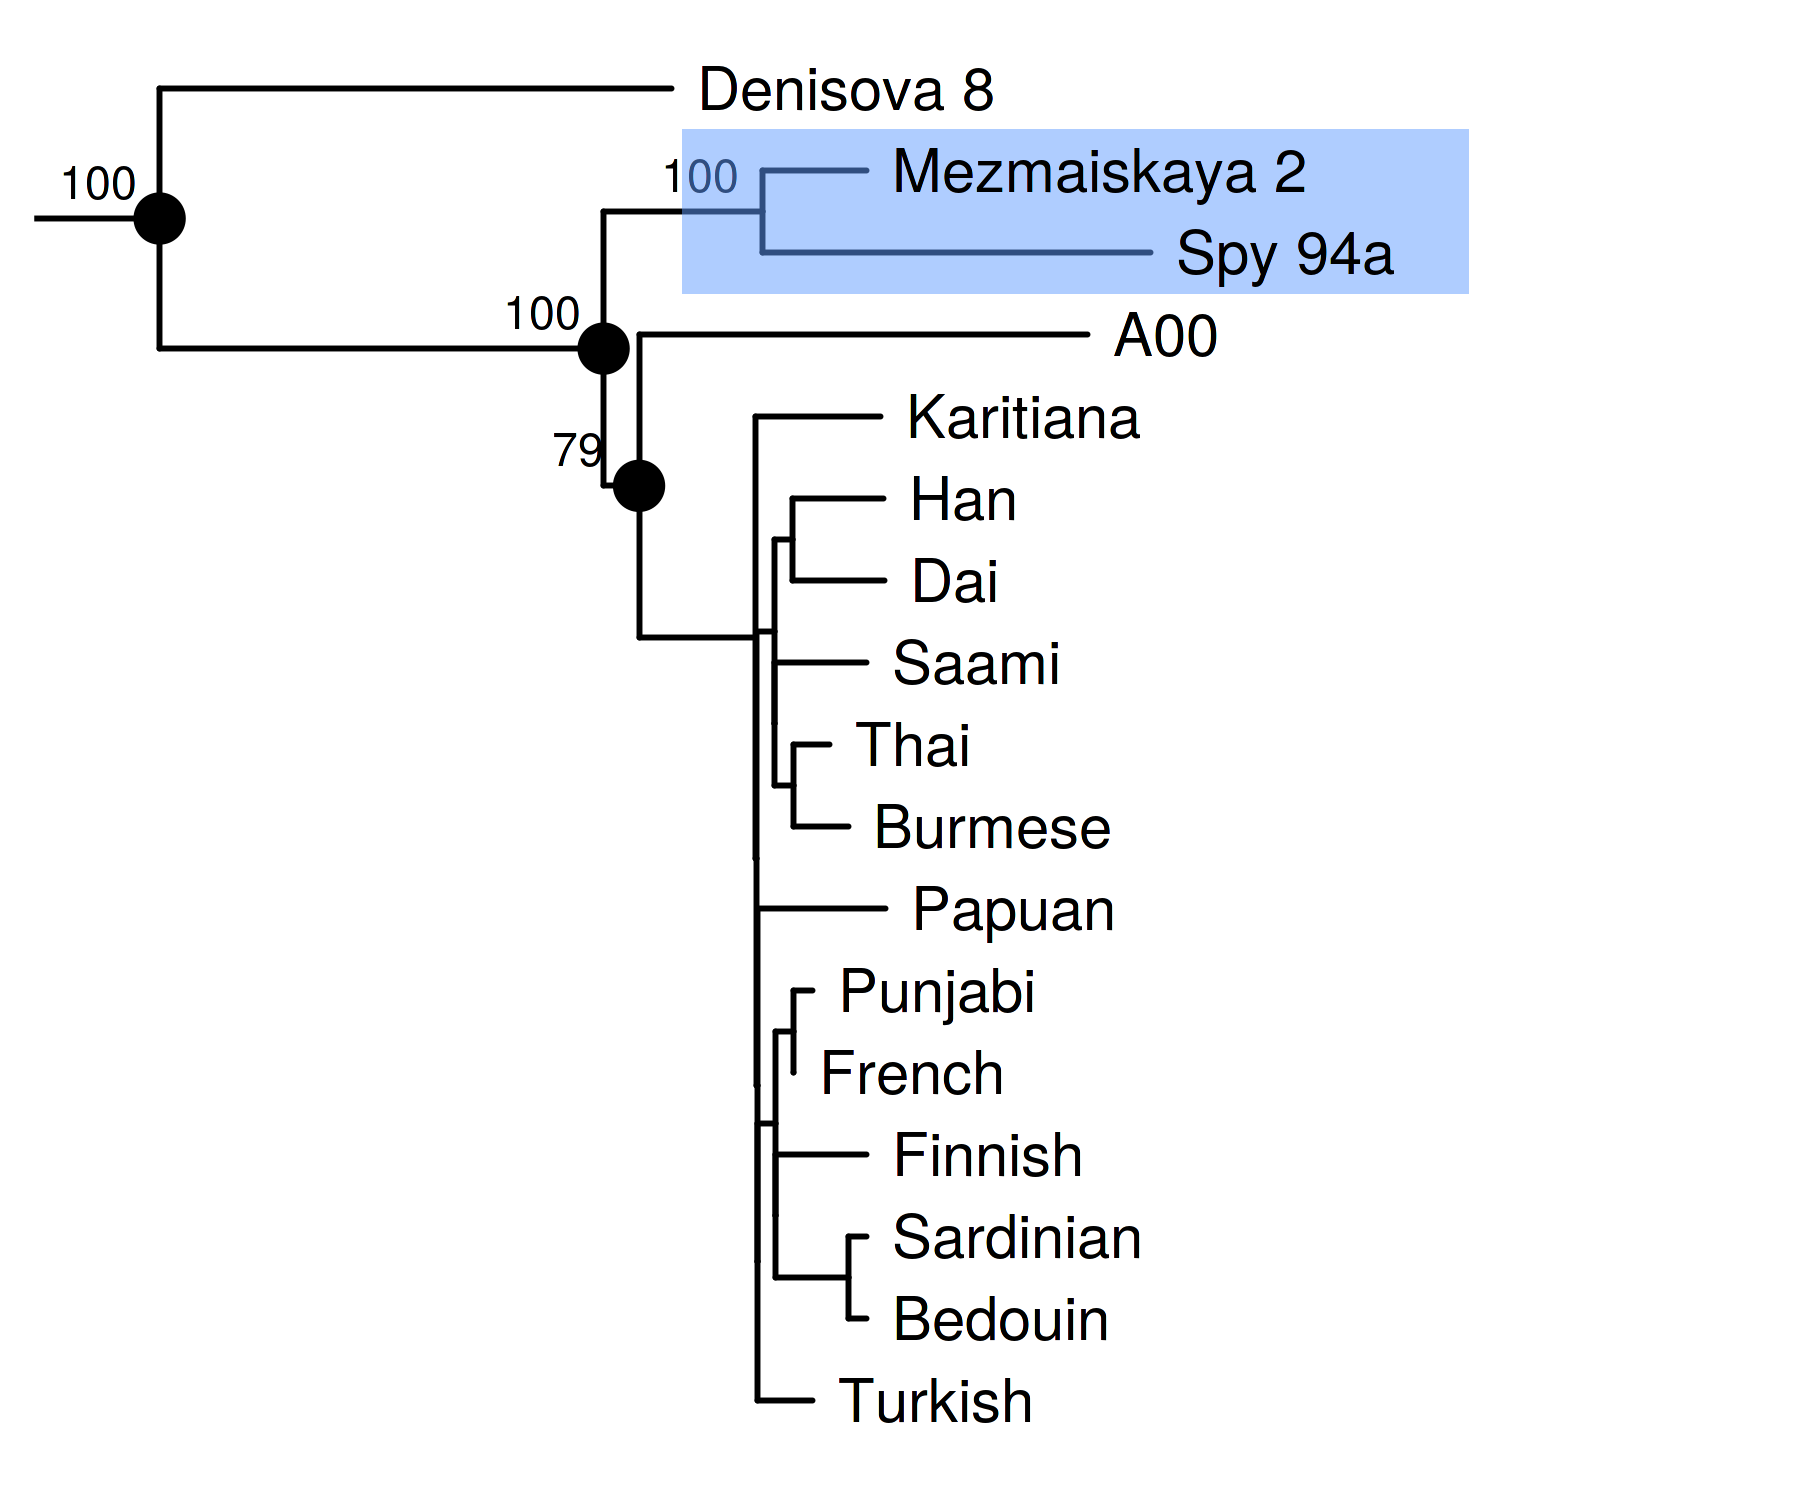

In [43]:
set_dim(6, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_text2(nudge_y = 0.45, nudge_x = -0.0006, aes(label = bootstrap,
               subset = node %in% c(den_node, neand_node, amh_node, amhneand_node, root_node))) +
    geom_hilight(node = den_node, fill = colors[2], extend = 0.0037) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.0031) +

    geom_rootedge(rootedge = root_node) +

    guides(color = F)

p %<+% df +
    geom_tiplab(offset = 0.0002, size = 5) +
    geom_point2(aes(subset = node %in% c(amhneand_node, root_node, amh_node)), size = 5) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.015))